In [1]:
import numpy as np
from scipy.special import ellipe
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Estimating the Perimeter of an Ellipse (sort of)

Inspired by [this](https://www.youtube.com/watch?v=5nW3nJhBHL0) video I wanted to go about trying to come up with "formulas" for estimating ellipses. 

This notebook (for now!) will try and see if we can get a reasonable perimeter 

In [9]:
# formula for perimeter of ellipse

def true_perim(a, b):
    '''
    Calculates true perimeter of ellipse
    by using integration formula:
    
    \int_0^{\pi/2} [1 - m \sin(t)^2]^{1/2} dt
    
    where m is the eccentricity of the ellipse
    '''
    
    e_sq = 1.0 - b**2/a**2
    perimeter = 4 * a * ellipe(e_sq)
    
    return perimeter

In [10]:
true_perim(1, 1)

6.283185307179586

We are now going to "estimate" our own "neater" formula.

Lets make a simple formula.

We can start with $\beta_a a + \beta_b b$ where we want to estimate $\beta := (\beta_a, \beta_b)$.

In [11]:
def ramanujan_formula(a, b):
    
    perimeter = np.pi * (3 * (a + b) - np.sqrt((3 * a + b) * (a + 3 * b)))
    
    return perimeter

In [12]:
def peri_flex(params, a, b):
    
    '''
    Flexible formulation of ellipse perimeter
    '''
    
    beta1 = params[0]
    beta2 = params[1]
    beta3 = params[2]
    beta4 = params[3]
    beta5 = params[4]

    perimeter = np.pi * (beta1 * a + beta2 * b - np.sqrt(beta3 * a ** 2 + beta4 * a * b + beta5 * b ** 2))
    
    return perimeter

In [13]:
def objective(params, agrid):
    
    obj = 0
    for a in agrid:
        obj += (peri_flex(params, a, 1) - true_perim(a, 1)) ** 2
    
    return obj

In [14]:
def get_estimates(agrid, obj):

    result = minimize(obj,
                        np.ones(5),
                        agrid,
                     bounds = [(1e-6, None)] * 5)
    
    return result

In [15]:
result = get_estimates(np.linspace(1, 5, 100), objective)

In [16]:
result

      fun: 2.2443392762830543e-06
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.67755577e-04,  4.72051902e-05, -3.67720790e-05, -8.84178442e-06,
        7.70362074e-06])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 300
      nit: 40
   status: 0
  success: True
        x: array([1.97575442, 1.78773554, 0.492797  , 2.46277184, 0.15375005])

In [17]:
agrid = np.linspace(1, 5, 100)
flexi_perim = np.zeros(100)
ramanujan_perim = np.zeros(100)

for idx, a in enumerate(agrid):
    flexi_perim[idx] = np.absolute(peri_flex(result.x, a, 1) - true_perim(a, 1))
    ramanujan_perim[idx] = np.absolute(ramanujan_formula(a, 1) - true_perim(a, 1))


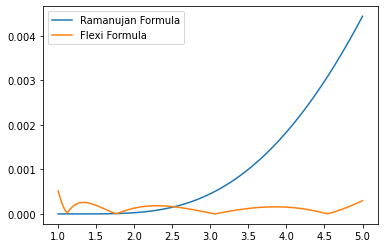

In [18]:
fig, ax = plt.subplots()
ax.plot(agrid, ramanujan_perim, label = "Ramanujan Formula")
ax.plot(agrid, flexi_perim, label = "Flexi Formula")
plt.legend()
plt.show()

In [19]:
result.x

array([1.97575442, 1.78773554, 0.492797  , 2.46277184, 0.15375005])

So my new elegant *ahem* formula for the perimeter of an ellipse is:

$$
\pi (1.97575442 * a + 1.78773554 * b - \sqrt{0.492797a^2 + 2.46277184ab + 0.15375005b^2})
$$
